In [1]:
!pip install ucimlrepo

In [2]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [4]:
print(X)
print(y)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  camp

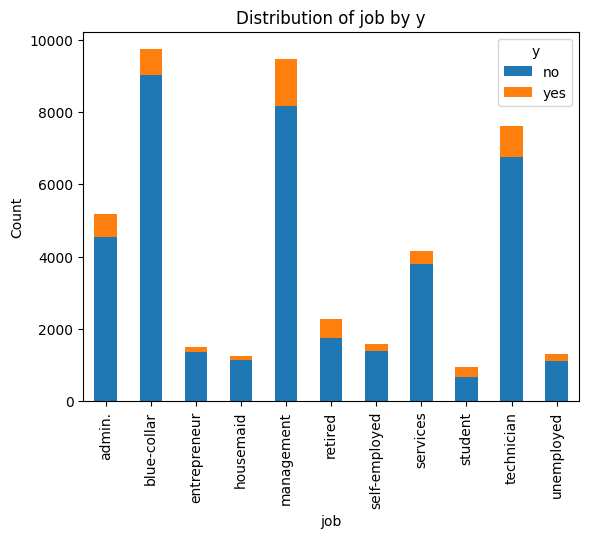

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

column = 'job'

# Combine X and y for visualization
data = pd.concat([X, y], axis=1)
counts = data.groupby([column, 'y']).size().unstack(fill_value=0)
counts.plot(kind='bar', stacked=True)

plt.title(f"Distribution of {column} by y")
plt.ylabel("Count")
plt.xlabel(column)
plt.legend(title="y")
plt.show()

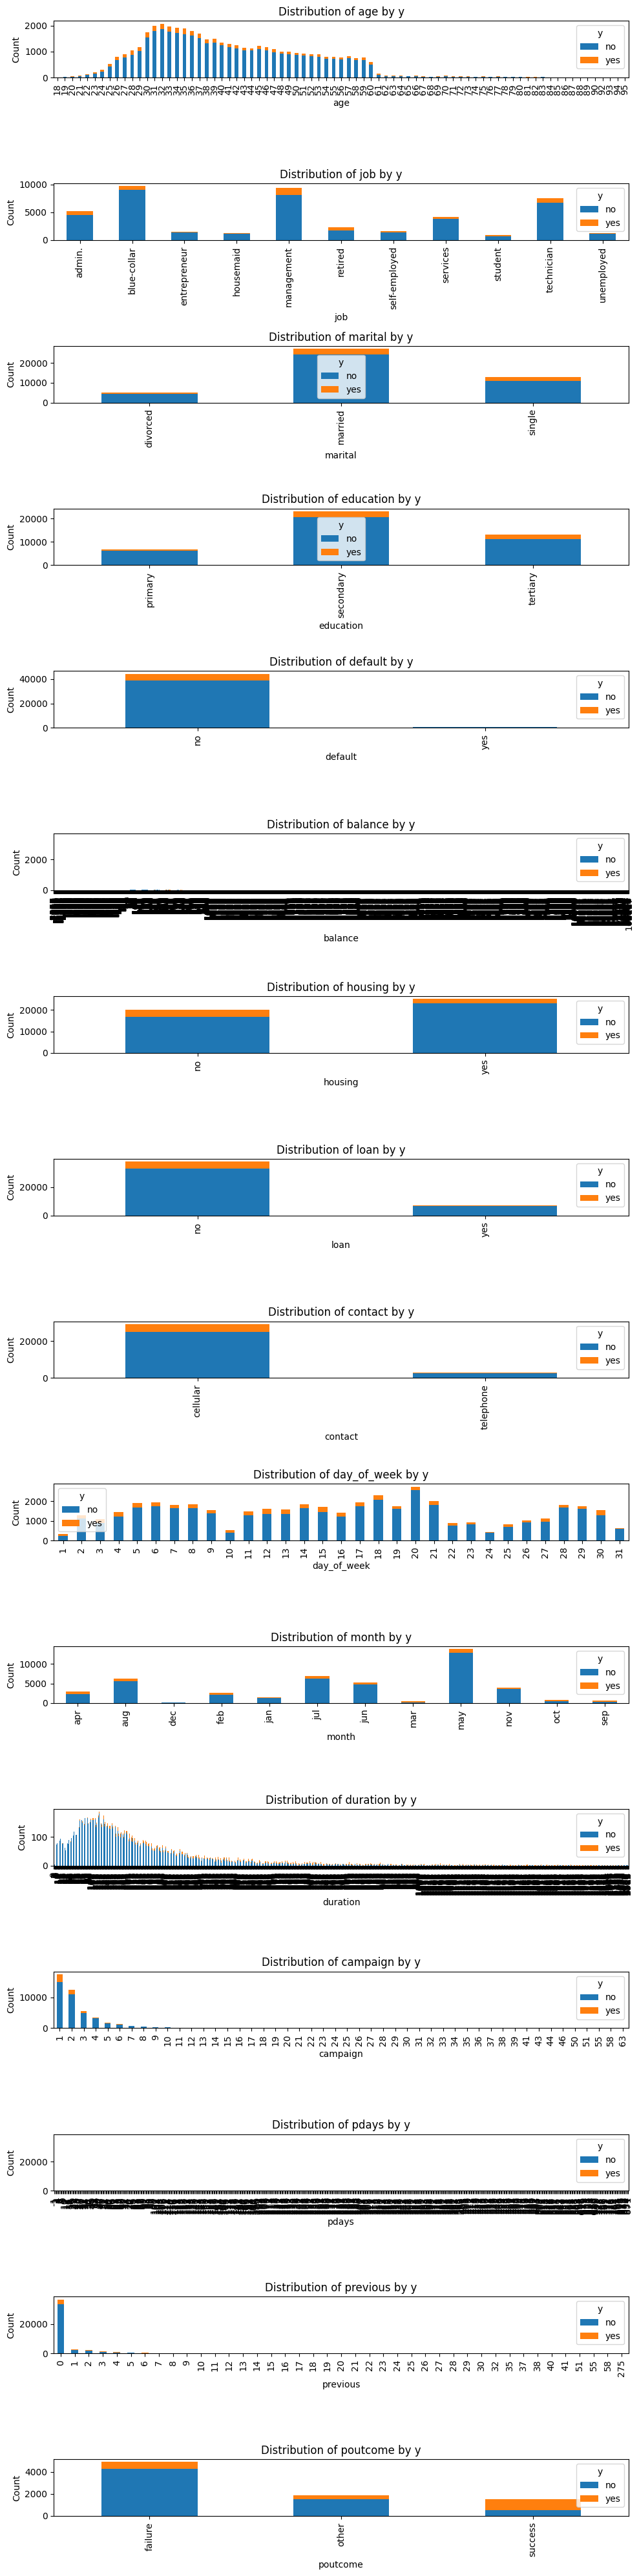

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine X and y for visualization
data = pd.concat([X, y], axis=1)

# Plot stacked bar charts for each column
fig, axes = plt.subplots(nrows=len(X.columns), ncols=1, figsize=(10, 40), tight_layout=True)

for i, column in enumerate(X.columns):
    ax = axes[i]
    # Count occurrences for each value in the column grouped by `y`
    counts = data.groupby([column, 'y']).size().unstack(fill_value=0)
    counts.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f"Distribution of {column} by y")
    ax.set_ylabel("Count")
    ax.set_xlabel(column)
    ax.legend(title="y")

plt.show()

In [6]:
# Data Preprocessing:
# Replace missing values
X['pdays'].replace(-1, 0)
X['pdays'].fillna(X['pdays'].median(), inplace=True)
X['poutcome'].fillna('nonexistent', inplace=True)
X['education'].fillna('unknown', inplace=True)
X['job'].fillna('unknown', inplace=True)
X['marital'].fillna('unknown', inplace=True)
X['contact'].fillna(X['contact'].mode()[0], inplace=True)
X.dropna(inplace=True)
X = X.drop(columns=['duration'])
print(X)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  campaign  pday

<ipython-input-6-3f8fdd22797b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['pdays'].fillna(X['pdays'].median(), inplace=True)
<ipython-input-6-3f8fdd22797b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['pdays'].fillna(X['pdays'].median(), inplace=True)
<ipython-input-6-3f8fdd22797b>:5: FutureWarning: A value is trying to be set on

In [7]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# One-hot encode categorical variables
categorical_cols = ['job', 'marital', 'education', 'contact', 'poutcome', 'month']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(type(X_encoded))
print(type(y))
# Replace yes/True to 1 and no/False to 0
X_encoded.replace({'yes': 1, 'no': 0, 'True': 1, 'False': 0}, inplace = True)
y.replace({'yes': 1, 'no': 0, 'True': 1, 'False': 0}, inplace = True)
X_encoded = X_encoded.astype(int)
y = y.astype(int)
y = y.to_numpy().ravel()
y = y.flatten()

X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   45211 non-null  int64
 1   default               45211 non-null  int64
 2   balance               45211 non-null  int64
 3   housing               45211 non-null  int64
 4   loan                  45211 non-null  int64
 5   day_of_week           45211 non-null  int64
 6   campaign              45211 non-null  int64
 7   pdays                 45211 non-null  int64
 8   previous              45211 non-null  int64
 9   job_blue-collar       45211 non-null  int64
 10  job_entrepreneur      45211 non-null  int64
 11  job_housemaid         45211 non-null  int64
 12  job_management        45211 non-null  int64
 13  job_retired           45211 non-null  int64
 14  job_self-employed     4521

<ipython-input-7-40d1cec8e3c9>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded.replace({'yes': 1, 'no': 0, 'True': 1, 'False': 0}, inplace = True)
<ipython-input-7-40d1cec8e3c9>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace({'yes': 1, 'no': 0, 'True': 1, 'False': 0}, inplace = True)
<ipython-input-7-40d1cec8e3c9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize numeric features
numeric_cols = ['age', 'balance', 'campaign', 'previous', 'pdays']
scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

In [9]:
print(len(X))
print(len(X_encoded))
print(X_encoded.shape)

45211
45211
(45211, 40)


In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

<ipython-input-11-f96b44b5190c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame({'Class': y_train}), x='Class', palette='viridis')


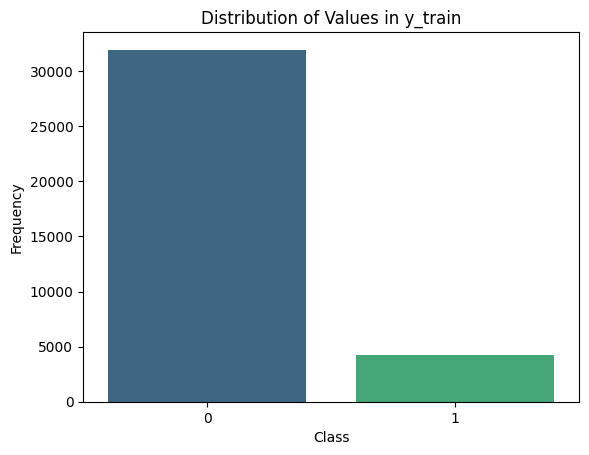

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert y_train to a pandas Series for easier handling
y_train_series = pd.Series(y_train, name='Class')

# Plot the distribution using Seaborn
sns.countplot(data=pd.DataFrame({'Class': y_train}), x='Class', palette='viridis')
plt.title('Distribution of Values in y_train')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

<ipython-input-12-1b48429d4f95>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame({'Class': y_train}), x='Class', palette='viridis')


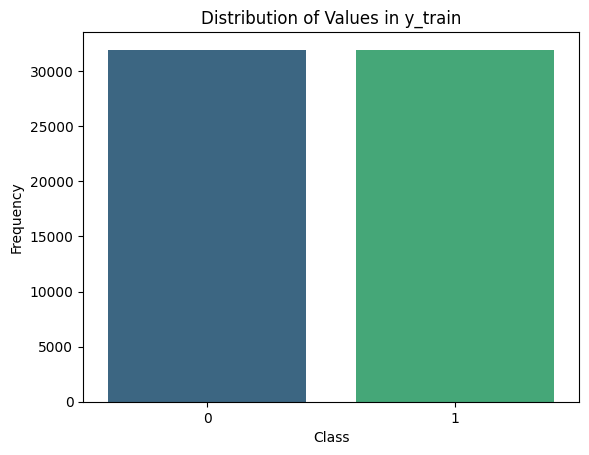

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
y_true = y_train.copy()

# Convert y_train to a pandas Series for easier handling
y_train_series = pd.Series(y_train, name='Class')

# Plot the distribution using Seaborn
sns.countplot(data=pd.DataFrame({'Class': y_train}), x='Class', palette='viridis')
plt.title('Distribution of Values in y_train')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [13]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def accuracy(weights, X, y_true):
    # Compute predictions
    z = np.dot(X, weights[:-1]) + weights[-1]  # Linear combination
    predictions = (sigmoid(z) >= 0.5).astype(int)  # Convert probabilities to binary labels

    # Calculate accuracy
    acc = np.mean(predictions == y_true) * 100
    return acc

def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z)

def loss(weights, X, y):
    m = X.shape[0]
    z = np.dot(X, weights[:-1]) + weights[-1]  # Linear combination
    predictions = sigmoid(z)  # Predicted probabilities
    loss_value = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
    return loss_value

def gradient_descent(weights, X, y, y_true, alpha, epochs):
    m = X.shape[0]  # Number of samples

    for epoch in range(epochs):
        # Compute predictions
        z = np.dot(X, weights[:-1]) + weights[-1]
        predictions = sigmoid(z)

        # Compute gradients
        error = predictions - y
        dw = np.dot(X.T, error) / m  # Gradient for weights
        db = np.sum(error) / m       # Gradient for bias

        # Update weights and bias
        weights[:-1] -= alpha * dw
        weights[-1] -= alpha * db

        # Track loss and accuracy
        current_loss = loss(weights, X, y)
        current_accuracy = accuracy(weights, X, y_true)
        loss_history.append(round(current_loss, 4))
        accuracy_history.append(round(current_accuracy, 2))

        # Print progress every 100 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {current_loss:.4f}, Accuracy = {current_accuracy:.2f}%")

    return weights

# Initialize weights (small random values)
weights = np.zeros(X_train.shape[1] + 1)

loss_history = []
accuracy_history = []

# Hyperparameters
learning_rate = 0.025
epochs = 1000

# Train softmax regression
trained_weights = gradient_descent(weights, X_train, y_train, y_true, learning_rate, epochs)

# Print final weights
print("Trained Weights:", trained_weights)

Epoch 0: Loss = 0.6923, Accuracy = 50.07%
Epoch 10: Loss = 0.6849, Accuracy = 56.10%
Epoch 20: Loss = 0.6786, Accuracy = 60.40%
Epoch 30: Loss = 0.6730, Accuracy = 60.96%
Epoch 40: Loss = 0.6680, Accuracy = 61.65%
Epoch 50: Loss = 0.6635, Accuracy = 62.64%
Epoch 60: Loss = 0.6595, Accuracy = 63.47%
Epoch 70: Loss = 0.6558, Accuracy = 64.19%
Epoch 80: Loss = 0.6524, Accuracy = 64.77%
Epoch 90: Loss = 0.6493, Accuracy = 65.18%
Epoch 100: Loss = 0.6464, Accuracy = 65.50%
Epoch 110: Loss = 0.6438, Accuracy = 65.76%
Epoch 120: Loss = 0.6413, Accuracy = 66.00%
Epoch 130: Loss = 0.6389, Accuracy = 66.26%
Epoch 140: Loss = 0.6367, Accuracy = 66.51%
Epoch 150: Loss = 0.6346, Accuracy = 66.83%
Epoch 160: Loss = 0.6326, Accuracy = 67.08%
Epoch 170: Loss = 0.6308, Accuracy = 67.27%
Epoch 180: Loss = 0.6290, Accuracy = 67.40%
Epoch 190: Loss = 0.6272, Accuracy = 67.55%
Epoch 200: Loss = 0.6256, Accuracy = 67.63%
Epoch 210: Loss = 0.6240, Accuracy = 67.81%
Epoch 220: Loss = 0.6225, Accuracy = 67.96%

In [14]:
# Compute accuracy on test data
test_accuracy = accuracy(trained_weights, X_test, y_test) / 100
print(f"Test Accuracy: {test_accuracy:.2%}")

Test Accuracy: 72.66%


In [15]:
print(loss_history)
print(accuracy_history)

[0.6923, 0.6915, 0.6908, 0.69, 0.6892, 0.6885, 0.6877, 0.687, 0.6863, 0.6856, 0.6849, 0.6843, 0.6836, 0.6829, 0.6823, 0.6816, 0.681, 0.6804, 0.6798, 0.6792, 0.6786, 0.678, 0.6774, 0.6768, 0.6762, 0.6757, 0.6751, 0.6746, 0.674, 0.6735, 0.673, 0.6724, 0.6719, 0.6714, 0.6709, 0.6704, 0.6699, 0.6694, 0.6689, 0.6685, 0.668, 0.6675, 0.6671, 0.6666, 0.6661, 0.6657, 0.6652, 0.6648, 0.6644, 0.6639, 0.6635, 0.6631, 0.6627, 0.6623, 0.6619, 0.6614, 0.661, 0.6606, 0.6603, 0.6599, 0.6595, 0.6591, 0.6587, 0.6583, 0.658, 0.6576, 0.6572, 0.6569, 0.6565, 0.6561, 0.6558, 0.6554, 0.6551, 0.6548, 0.6544, 0.6541, 0.6537, 0.6534, 0.6531, 0.6527, 0.6524, 0.6521, 0.6518, 0.6515, 0.6512, 0.6508, 0.6505, 0.6502, 0.6499, 0.6496, 0.6493, 0.649, 0.6487, 0.6484, 0.6481, 0.6479, 0.6476, 0.6473, 0.647, 0.6467, 0.6464, 0.6462, 0.6459, 0.6456, 0.6454, 0.6451, 0.6448, 0.6446, 0.6443, 0.644, 0.6438, 0.6435, 0.6433, 0.643, 0.6427, 0.6425, 0.6422, 0.642, 0.6418, 0.6415, 0.6413, 0.641, 0.6408, 0.6405, 0.6403, 0.6401, 0.6398,

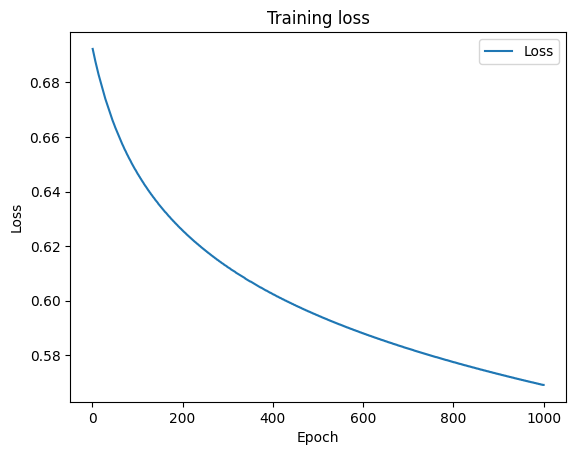

In [16]:
import matplotlib.pyplot as plt

epoch = range(1, len(loss_history) + 1)

plt.plot(epoch, loss_history, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss')
plt.legend()
plt.show()

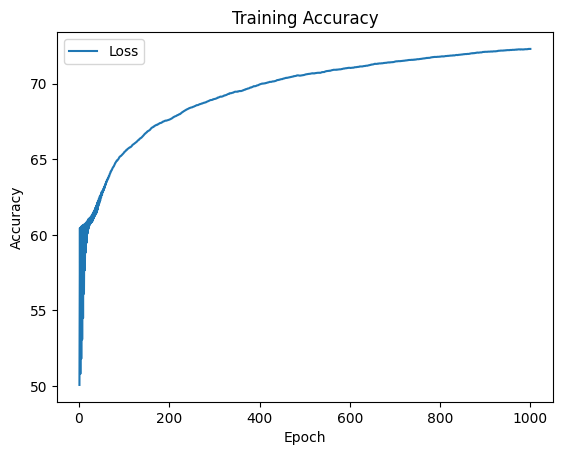

In [17]:
import matplotlib.pyplot as plt

epoch = range(1, len(loss_history) + 1)

plt.plot(epoch, accuracy_history, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

In [18]:
!pip install modelbit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 6.6 MB/s eta 0:00:00


In [19]:
import modelbit
mb = modelbit.login()

In [20]:
import random

def predict_weather(days_from_now: int):
  prediction = random.choice(["sunny", "cloudy", "just right"])
  return {
    "weather": prediction,
    "message": f"In {days_from_now} days it will be {prediction}!"
  }

mb.deploy(predict_weather)